In [13]:
from mlxtend.frequent_patterns import  fpgrowth
import  pandas as pd
import matplotlib.pyplot as plt

In [14]:
#dirt
data = {
    "交易编号":[1,2,3,4,5],
    "商品": ['牛奶, 面包', '面包, 黄油', '牛奶, 黄油', '牛奶, 面包', '牛奶, 面包, 黄油']
}
df = pd.DataFrame(data)
df

,交易编号,商品
0,1,"牛奶, 面包"
1,2,"面包, 黄油"
2,3,"牛奶, 黄油"
3,4,"牛奶, 面包"
4,5,"牛奶, 面包, 黄油"


In [15]:
encode_df = df["商品"].str.get_dummies(", ")
encode_df

,牛奶,面包,黄油
0,1,1,0
1,0,1,1
2,1,0,1
3,1,1,0
4,1,1,1


In [16]:
rules = fpgrowth(encode_df,min_support=0.3,use_colnames=True)
rules

E:\software\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.8,(面包)
1,0.8,(牛奶)
2,0.6,(黄油)
3,0.6,"(面包, 牛奶)"
4,0.4,"(黄油, 面包)"
5,0.4,"(黄油, 牛奶)"


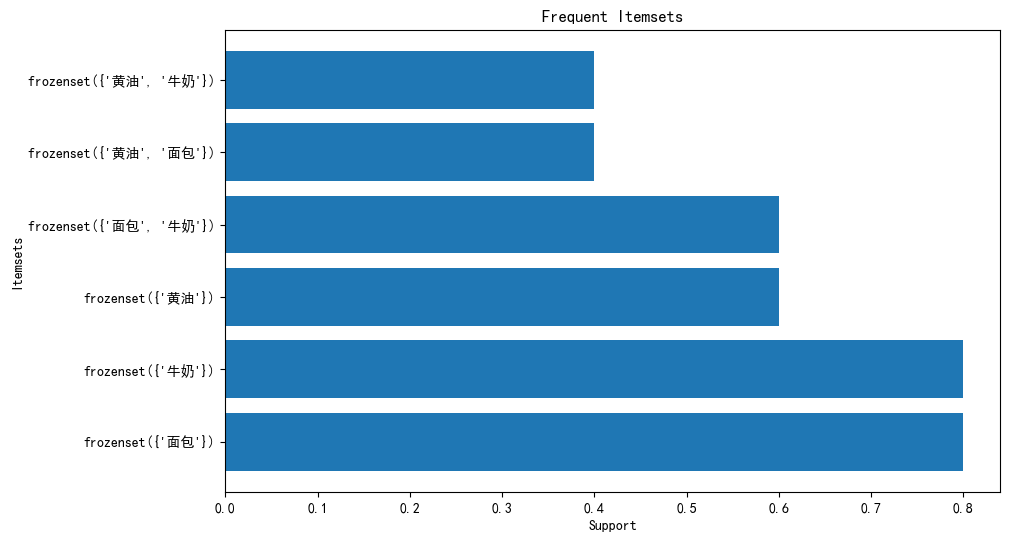

In [17]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.barh(range(len(rules)), rules['support'], tick_label=rules['itemsets'])
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Frequent Itemsets')
plt.show()